# Pre-process Allen Brain morphology data

In [3]:
%matplotlib inline

import os
import sys
notebook_path = os.path.abspath('')
sources_path = os.path.abspath(os.path.join(notebook_path, 'sources'))
sys.path.insert(0, sources_path)

import numpy as np
import matplotlib.pylab as plt

from allensdk.core.cell_types_cache import CellTypesCache

from allen_data import ProcessedAllenNeuronMorphology

In [4]:
optosynth_data_path = '/home/jupyter/external_disk/OPTO_DATA'

In [5]:
morphology_output_path = os.path.join(optosynth_data_path, 'processed_morphology')
if not os.path.exists(morphology_output_path):
    os.mkdir(morphology_output_path)

In [6]:
ctc = CellTypesCache(manifest_file=os.path.join(optosynth_data_path, 'allen_data', 'manifest.json'))
cell_ids = np.load(os.path.join(optosynth_data_path, 'allen_data', 'good_cell_ids.npy'))

In [7]:
for idx, cell_id in enumerate(cell_ids):
    print(f'Processing cell #{idx + 1} ({cell_id}) ...')
    morph = ctc.get_reconstruction(cell_id)
    neuron = ProcessedAllenNeuronMorphology.from_morphology(
        cell_id, morph, soma_scale_factor=0.75, dendrite_scale_factor=5.0)
    neuron.save(morphology_output_path)

Processing cell #1 (480116737) ...
Processing cell #2 (574036994) ...
Processing cell #3 (483101699) ...
Processing cell #4 (471767045) ...
Processing cell #5 (475625477) ...
Processing cell #6 (480353286) ...
Processing cell #7 (486110216) ...
Processing cell #8 (582613001) ...
Processing cell #9 (475888653) ...
Processing cell #10 (490382353) ...
Processing cell #11 (490916882) ...
Processing cell #12 (479721491) ...
Processing cell #13 (485468180) ...
Processing cell #14 (565866518) ...
Processing cell #15 (313862167) ...
Processing cell #16 (487664663) ...
Processing cell #17 (324025371) ...
Processing cell #18 (570896413) ...
Processing cell #19 (526573598) ...
Processing cell #20 (567927838) ...
Processing cell #21 (526531616) ...
Processing cell #22 (485058595) ...
Processing cell #23 (386970660) ...
Processing cell #24 (574993444) ...
Processing cell #25 (502999078) ...
Processing cell #26 (577218602) ...
Processing cell #27 (565209132) ...
Processing cell #28 (396608557) ...
P

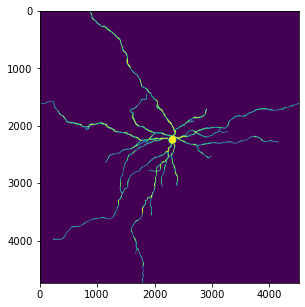

In [9]:
cell_id = cell_ids[9]
neuron = ProcessedAllenNeuronMorphology.from_file(
    os.path.join(morphology_output_path, f'{cell_id}_processed_morphology.pkl'))
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.set_aspect('equal')
ax.imshow(neuron.mask)

In [8]:
print("DONE")

DONE
